#### ***Img : Iris Flower***

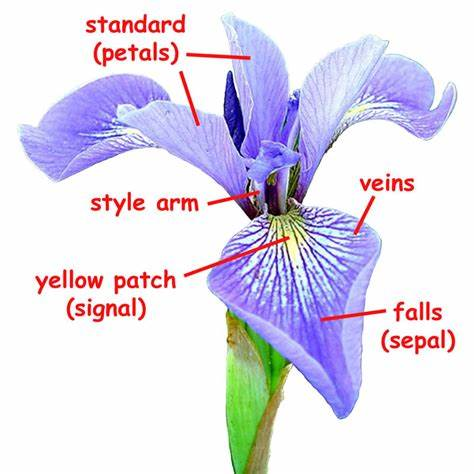

#### ***Import Libaries*** 

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### ***Import Dataset***

In [8]:
from sklearn.datasets import load_iris

In [13]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(df.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
# df.data
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Logistic Regression till now we have studied with two values of hten target varible >> Binary Classification

##### *Make Data Frame*

In [23]:
data = pd.DataFrame(df.data,columns=df.feature_names)
data["target"] = df.target

In [30]:
data["target"].groupby(data['target']).count()
# data["target"].value_counts()

target
0    50
1    50
2    50
Name: target, dtype: int64

In [34]:
# for binary classfication : Remove the Data Point which has taget is 3
data = data[data["target"]!=2]
data.shape

(100, 5)

In [35]:
data["target"].groupby(data['target']).count()
# data["target"].value_counts()

target
0    50
1    50
Name: target, dtype: int64

##### *Split Independet and Dependent Variable*

In [56]:
X = data.drop(columns=['target'])
y = data["target"]

In [52]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [53]:
X.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [57]:
y.head(1)

0    0
Name: target, dtype: int32

##### ***Split Training and Testing Datapoints***

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)


In [61]:
print(f"Shpae Of X_train :{X_train.shape}\nShape Of X_test : {X_test.shape}\n{'-'*20}\nShape Of y_train {y_train.shape}\nShape Of y_test {y_test.shape}")

Shpae Of X_train :(75, 4)
Shape Of X_test : (25, 4)
--------------------
Shape Of y_train (75,)
Shape Of y_test (25,)


##### ***Import Model Class from sklearn and make the model***

In [63]:
# Model Train 
from sklearn.linear_model import LogisticRegression

logistic_classifier_model = LogisticRegression()
logistic_classifier_model

LogisticRegression()

### Attribute in Logistic Regression

##### Attribute in Logistic Regression

* penalty :

        penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

        l2 is by default value of penalty.

        Specify the norm of the penalty:

        None: no penalty is added;

        'l2': add a L2 penalty term and it is the default choice;

        'l1': add a L1 penalty term;

        'elasticnet': both L1 and L2 penalty terms are added.

* C : it is inverse value of lambda (regression parameter) value lie between 0 to infinity
     
* dual : <br>
        1. Some type of optimization parameter    <br>
        2. dual contian boolen value    <br>
        3. by default value is False   <br>
        4. dual=False when n_samples > n_features.

    
* class_weight (default is None): If the dataset is imbalanced then gives ration 

* fit_intercept : required intercept or not required intercept. It contion TRUE/FALSE

* solver :
        solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’

        >> Solver is optimazation technique to reach to the minima like grident desecent

* max_iter :
        max_iterint, default=100
        Maximum number of iterations taken for the solvers to converge.



###

##### ***Train The Model***

In [64]:
logistic_classifier_model.fit(X_train,y_train)

LogisticRegression()

##### *predict value for X_test which y_pred*

In [ ]:
# Predict y_test values
y_pred = logistic_classifier_model.predict(X_test)

In [66]:
# getting Probability of each data point and each data point

logistic_classifier_model.predict_proba(X_test)
# Corresponding To Higher Probability class is predicted # Here cutoff is 0.5

#  Ouput like
# [[0.04224398, 0.95775602],...] ==[[class 0, class 1],...]

array([[0.04224398, 0.95775602],
       [0.01099251, 0.98900749],
       [0.98656774, 0.01343226],
       [0.056682  , 0.943318  ],
       [0.14139339, 0.85860661],
       [0.97894219, 0.02105781],
       [0.98151829, 0.01848171],
       [0.03453334, 0.96546666],
       [0.03542559, 0.96457441],
       [0.00914561, 0.99085439],
       [0.02597648, 0.97402352],
       [0.97438171, 0.02561829],
       [0.00554403, 0.99445597],
       [0.00260468, 0.99739532],
       [0.00828326, 0.99171674],
       [0.98562688, 0.01437312],
       [0.96513351, 0.03486649],
       [0.94766675, 0.05233325],
       [0.00783869, 0.99216131],
       [0.97675455, 0.02324545],
       [0.9835812 , 0.0164188 ],
       [0.00596324, 0.99403676],
       [0.01324923, 0.98675077],
       [0.02113473, 0.97886527],
       [0.97925627, 0.02074373]])

#### ***Evaluation Metrix***

In [67]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

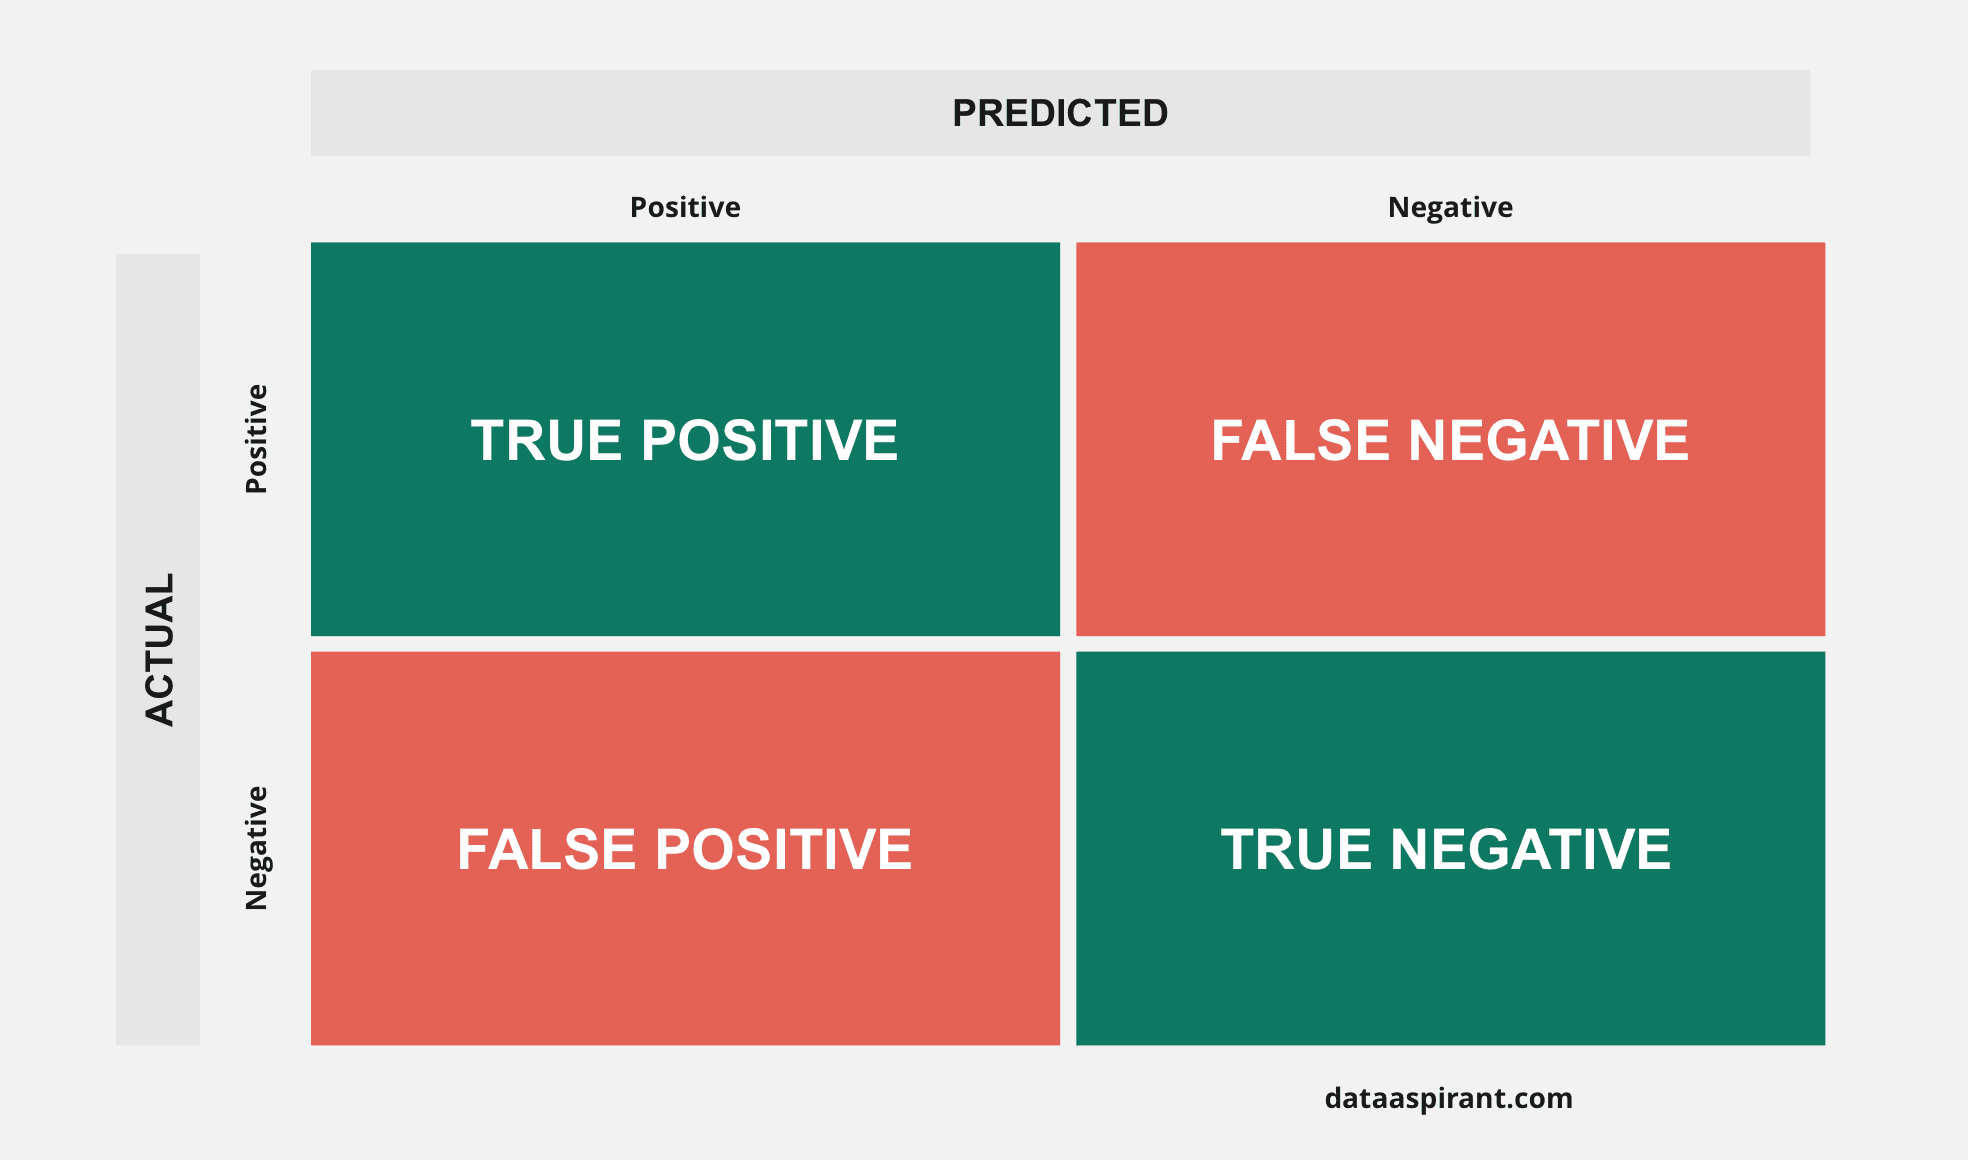

In [69]:
# First Evaluation Metrix 
confusion_matrix(y_test,y_pred)

array([[10,  0],
       [ 0, 15]], dtype=int64)

In [70]:
# In this case accuracy is 100%
accuracy_score(y_test,y_pred)

1.0

In [71]:
print(classification_report(y_test,y_pred))

# Support in number of data point belong to specific class
# class 0 having 10 datapoint 
# first two rows : 0 and 1 >> precision recall, f1 score and no. of data point with respect to respective class similariy for recall f1 score 
# Weighte avg is used is case imbalanced it gives important to performance of dominant class
# Macro avg : for each class take simple avg >> avg precision of class 0 and class 1 will be macro average 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [75]:
from sklearn.metrics import roc_curve,auc 

# Getting Probability of all class
# logistic_classifier_model.predict_proba(X_test)

# get predicted probabilities of class one 
y_pred_proba = logistic_classifier_model.predict_proba(X_test)[ : ,1]

In [77]:
y_pred_proba

array([0.95775602, 0.98900749, 0.01343226, 0.943318  , 0.85860661,
       0.02105781, 0.01848171, 0.96546666, 0.96457441, 0.99085439,
       0.97402352, 0.02561829, 0.99445597, 0.99739532, 0.99171674,
       0.01437312, 0.03486649, 0.05233325, 0.99216131, 0.02324545,
       0.0164188 , 0.99403676, 0.98675077, 0.97886527, 0.02074373])

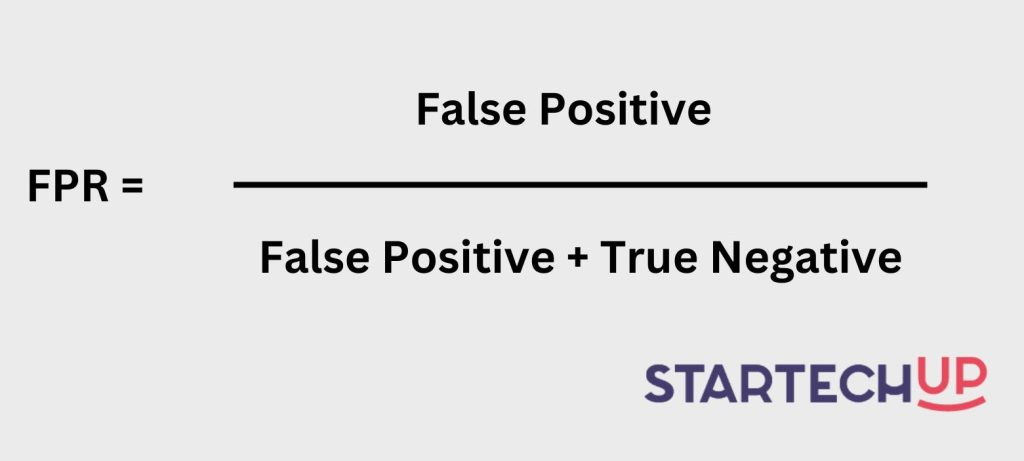

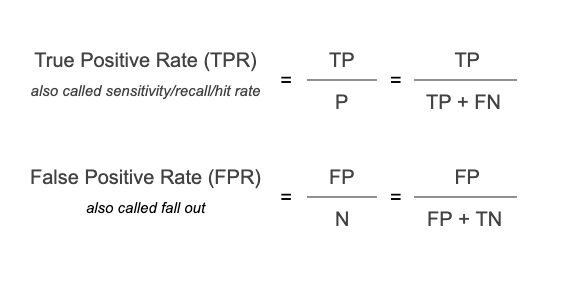

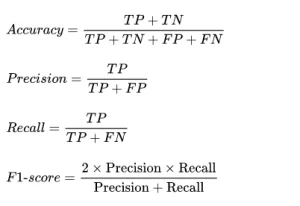

In [79]:
# reciever operating characteristices curve
# inputs : y_test, y_pred_proba. It will return TPR, FPR with different cutoff of probabilities

fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

In [83]:
roc_auc = auc(fpr,tpr)
# we getting 1 because it has 100% accurate model

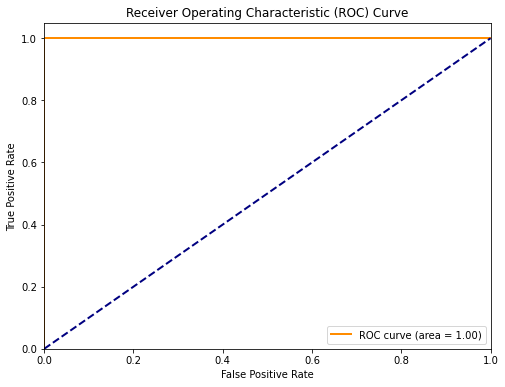

In [84]:
#plot roc-auc curve

plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()  # Show the plot

#### Cross Validatiaon

In [ ]:
# Randomized Search CV or grid Search CV  >> generic method with hyperparameter turning 
# Logistic Regression CV>> specific to logistic Regression
#  Kfold >> Generic method only for cross validation 

In [85]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [88]:
cv = KFold(n_splits=5)
# suffle : boolean value, default : False
# Whether to shuffle the data before splitting into batches
# Note That : The sample withing each split will not be suffled
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [91]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_classifier_model, X_train, y_train, cv = cv, scoring='accuracy')
scores

array([1., 1., 1., 1., 1.])